### Student Information
Name：薛擎

Student ID：112033630

GitHub ID：as825644123

Python version：3.9.6

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Assignment

## Part 1. Take Home Exercises

### ** Run something required **  

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### ** >>> Exercise 1 (5 min) **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
# Answer here
for i in range(3):
    print("\n".join(twenty_train.data[i].split("\n")))
    print("------" * 20, i + 1)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

------------------------------------------------------------------------------------------------------------------------ 1
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have

### ** >>> Exercise 2 (take home) ** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# Answer here
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

X_reverse = X[::-1]
X_reverse[10:]

,text
2246,From: lmvec@westminster.ac.uk (William Hargrea...
2245,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...
2244,From: jim.zisfein@factory.com (Jim Zisfein) S...
2243,From: turpin@cs.utexas.edu (Russell Turpin) Su...
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...
...,...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


### ** >>> Exercise 3 (5 min) **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [4]:
# Answer here

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X[X["category_name"] == "sci.med"].loc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### ** >>> Exercise 4 (5 min) ** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [5]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

# axis = 0 -> column by column
# axis = 1 -> raw by raw

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### ** >>> Exercise 5 (take home) ** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

# .isnull() 不能處理不同資料型的的null ex: pn.nan、'nan'、'None'、None

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [8]:

# Answer here
'''
0. null of the numpy data type.
1. The 'missing_example' field does not exist, so it is empty.
2. .isnull() is only applicable to integer and floating-point data types.
3. .isnull() is only applicable to integer and floating-point data types.
4. 'None' is the Python representation of null.
5. .isnull() is only applicable to integer and floating-point data types.
'''

"\n0. null of the numpy data type.\n1. The 'missing_example' field does not exist, so it is empty.\n2. .isnull() is only applicable to integer and floating-point data types.\n3. .isnull() is only applicable to integer and floating-point data types.\n4. 'None' is the Python representation of null.\n5. .isnull() is only applicable to integer and floating-point data types.\n"

### ** >>> Exercise 6 (take home) **
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
# Answer here

'''
1. X is the data source and X_sample is sample data, which means all the data in X_sample are come from X.
2. If you use randomly sampling, every time the data in X_sample are always totally different.
3. The size of X_sample is according to the sample size you choose(EX: if n = 1000, so the len(X_sample) will be 1000).
4. The shapes are completely identical, except for the size.
'''

'\n1. X is the data source and X_sample is sample data, which means all the data in X_sample are come from X.\n2. If you use randomly sampling, every time the data in X_sample are always totally different.\n3. The size of X_sample is according to the sample size you choose(EX: if n = 1000, so the len(X_sample) will be 1000).\n4. The shapes are completely identical, except for the size.\n'

### ** >>> Exercise 7 (5 min) **
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

264
category_name
sci.med                   264
soc.religion.christian    260
comp.graphics             253
alt.atheism               223
Name: count, dtype: int64


"\nBy using the function 'max()', we can easily obtain the maximum length from 'X_sample.category_name.value_counts()'.\nThis way, we don't need to print the entire 'X_sample.category_name.value_counts()' and manually search for the maximum value.\n"

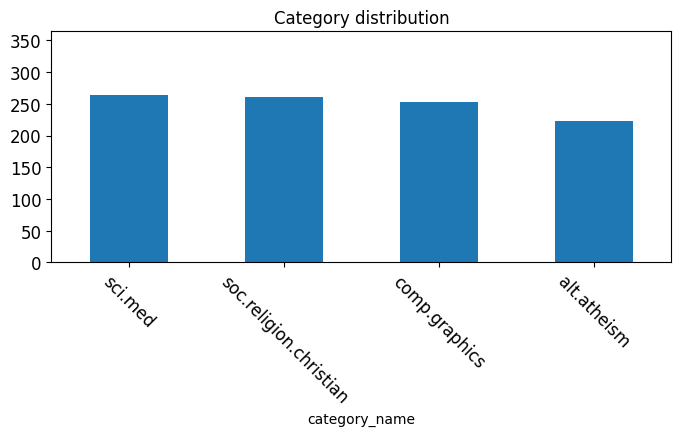

In [10]:
# Answer here

import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 100) # max_length + 100
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = -45, fontsize = 12, figsize = (8,3))

'''
By using the function 'max()', we can easily obtain the maximum length from 'X_sample.category_name.value_counts()'.
This way, we don't need to print the entire 'X_sample.category_name.value_counts()' and manually search for the maximum value.
'''

### ** >>> Exercise 8 (take home) ** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

0                comp.graphics
1                comp.graphics
2       soc.religion.christian
3       soc.religion.christian
4       soc.religion.christian
                 ...          
2252                   sci.med
2253                   sci.med
2254                   sci.med
2255                   sci.med
2256                   sci.med
Name: category_name, Length: 2257, dtype: object
------------------------------------------------------------------------------------------
category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
------------------------------------------------------------------------------------------


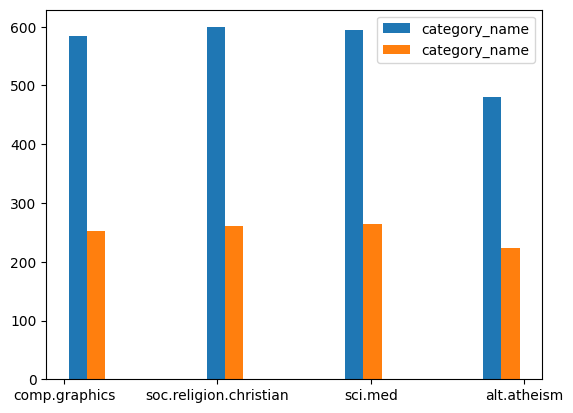

In [11]:
# Answer here

print(X.category_name)
print('---' * 30)
print(X.category_name.value_counts())
print('---' * 30)
print(type(X.category_name.value_counts()))
print('---' * 30)

plt.hist([X.category_name, X_sample.category_name],
         label = ['category_name', 'category_name'])
plt.legend(loc='upper right')
plt.show()

### ** >>> Exercise 9 (5 min) **
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [12]:
# Answer here

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) # learn the vocabulary and return document-term matrix

# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze = count_vect.build_analyzer()
print(X.text[2])
analyze(X.text[2])

From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63  (Well, I'll email also, but this may apply to other people, so I'll post also.)  >I've been working at this company for eight years in various >engineering jobs.  I'm female.  Yesterday I counted and realized that >on seven different occasions I've been sexually harrassed at this >company.  >I dreaded coming back to work today.  What if my boss comes in to ask >me some kind of question...  Your boss should be the person bring these problems to.  If he/she does not seem to take any action, keep going up higher and higher. Sexual harrassment does not need to be tolerated, and it can be an enormous emotional support to discuss this with someone and know that they are trying to do something about it.  If you feel you can not discuss this with your boss, perhaps your company has a personnel department that can work for you while preserving you

['from',
 'djohnson',
 'cs',
 'ucsd',
 'edu',
 'darin',
 'johnson',
 'subject',
 're',
 'harrassed',
 'at',
 'work',
 'could',
 'use',
 'some',
 'prayers',
 'organization',
 'cse',
 'dept',
 'san',
 'diego',
 'lines',
 '63',
 'well',
 'll',
 'email',
 'also',
 'but',
 'this',
 'may',
 'apply',
 'to',
 'other',
 'people',
 'so',
 'll',
 'post',
 'also',
 've',
 'been',
 'working',
 'at',
 'this',
 'company',
 'for',
 'eight',
 'years',
 'in',
 'various',
 'engineering',
 'jobs',
 'female',
 'yesterday',
 'counted',
 'and',
 'realized',
 'that',
 'on',
 'seven',
 'different',
 'occasions',
 've',
 'been',
 'sexually',
 'harrassed',
 'at',
 'this',
 'company',
 'dreaded',
 'coming',
 'back',
 'to',
 'work',
 'today',
 'what',
 'if',
 'my',
 'boss',
 'comes',
 'in',
 'to',
 'ask',
 'me',
 'some',
 'kind',
 'of',
 'question',
 'your',
 'boss',
 'should',
 'be',
 'the',
 'person',
 'bring',
 'these',
 'problems',
 'to',
 'if',
 'he',
 'she',
 'does',
 'not',
 'seem',
 'to',
 'take',
 'any',


### ** >>> Exercise 10 (take home) **
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
print(X.text[0])
print(X_counts)
count_vect.get_feature_names_out()[14887]

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  

'from'

In [14]:
# Answer here
# we convert from saprse array to DENSE MATRIX

print(X_counts[0:5, 0:100].toarray())

# 取前面五個Documents中，'count_vect.vocabulary_'裡面index為0~99的詞彙，其值代表該字會出現頻率
# [0][0]的value代表第0個Document中，'count_vect.vocabulary_'中index為0的詞彙其出現的頻率

print('--' * 30)
print(count_vect.get_feature_names_out()[0:100])
print('--' * 30)

doc = 0
for raw in X_counts[0:5, 0:100].toarray():
    index = 0
    for column in raw:
        if(column >= 1):
            print("第 {} 個Document(index = {})，\"count_vect.get_feature_names_out()\"中第 {} 個詞彙(index = {})，: {} ，期出現頻率為 {}".format(0 + doc + 1,
                                                                                                          0 + doc, 
                                                                                                          index + 1, 
                                                                                                          index, 
                                                                                                          count_vect.get_feature_names_out()[0 + index], 
                                                                                                          column))
        index += 1
    doc += 1

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

### ** >>> Exercise 11 (take home) ** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

(2257, 35788)


,bisectors,predestination,larynx,niehs,sgi_rad,und,bedroom,8416,cephas,103237,...,expounded,suppossed,subgenius,yapg,qualitatively,moan,funeral,sake,combat,laboratories
1589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


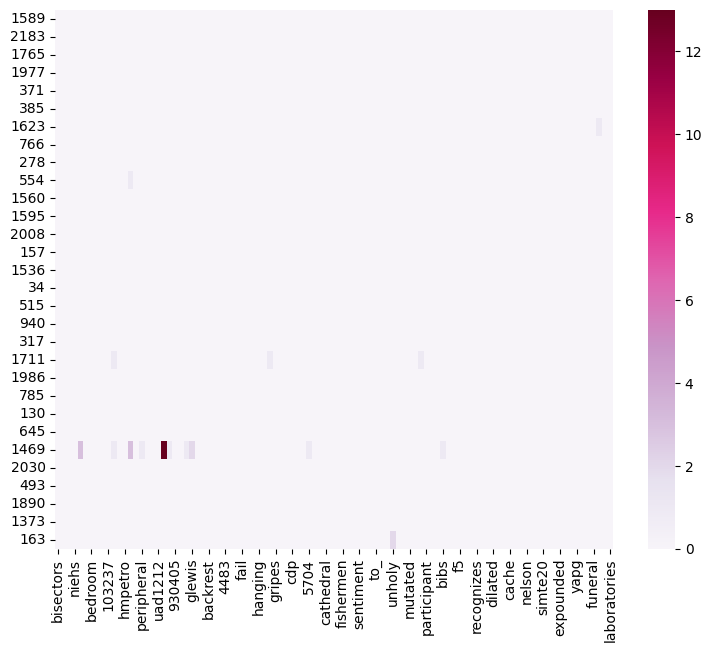

In [15]:
# Answer here

import seaborn as sns

# Randomly select 100 vocabulary and 30 documents.
# Show the heat map.

print(X_counts.shape)

sample_size_vocabulary = 100
sample_size_doc = 30

while(True):
    plot_X = np.random.choice(list(count_vect.get_feature_names_out()), sample_size_vocabulary)
    plot_Y = np.random.choice(list(X.index), sample_size_doc)
    plot_Z = X_counts[X.index.isin(plot_Y)][:, [count_vect.vocabulary_[term] for term in plot_X]]
    if(plot_Y.shape[0] == plot_Z.shape[0]):
        break

max_num = (np.max(plot_Z))

df_todraw_3d = pd.DataFrame(plot_Z.toarray(), columns = plot_X, index = plot_Y)
display(df_todraw_3d)
plt.subplots(figsize=(9, 7)) # The size of heat map.
ax = sns.heatmap(df_todraw_3d,
                 cmap = "PuRd",
                 vmin = 0, vmax = max_num)

# cmap -> color of heat map.
# vmin、vmax -> the range of value in heat map.
# annot -> show the value in each small block.

### ** >>> Exercise 12 (take home) **
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


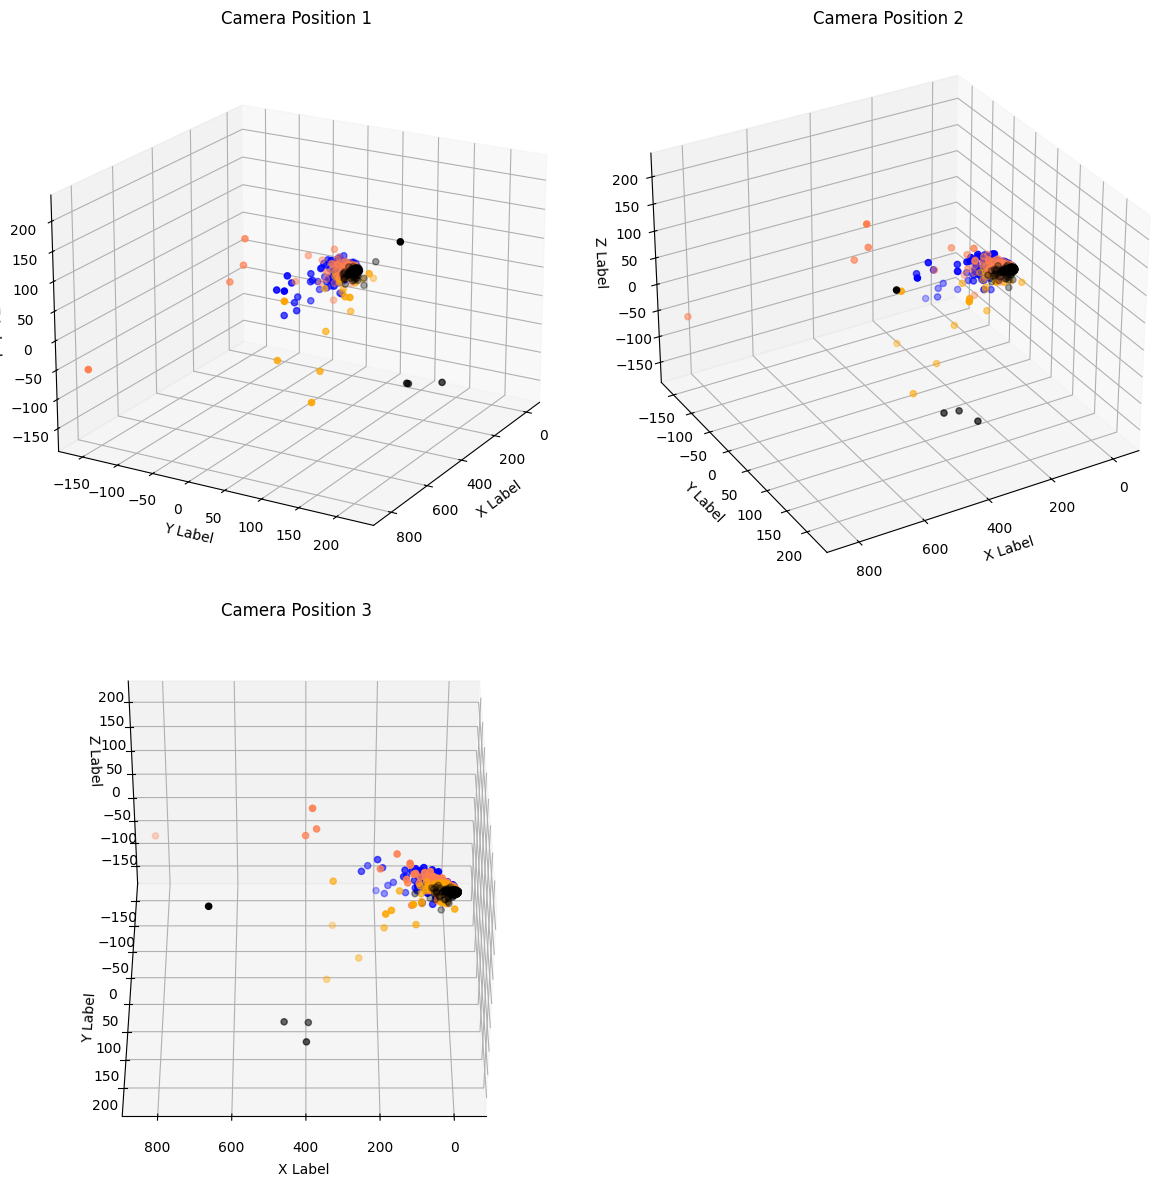

In [16]:
# Answer here

from sklearn.decomposition import PCA

col = ['coral', 'blue', 'black', 'orange']
X_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_3d.shape)

fig = plt.figure(figsize=(12, 12))
angles = [(20, 30), (30, 60), (40, 90)]

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')  # Create a subplot

    for c, category in zip(col, categories):
        xs = X_3d[X['category_name'] == category].T[0]
        ys = X_3d[X['category_name'] == category].T[1]
        zs = X_3d[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c=c, marker='o')

    ax.set_title(f'Camera Position {i}')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

### ** >>> Exercise 13 (take home) **
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [17]:
# Answer here

import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

data = pd.DataFrame({
    'Vocabulary': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

fig = px.bar(data, x = 'Vocabulary', y = 'Frequency', text = 'Frequency', title = 'The first 300 Vocabulary Frequencies')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=45)
fig.show()

# x -> the value in x-axis is data['Vocabulary'].
# y -> the value in y-axis is data['Frequency'].
# text -> the text on the each bat is data['Frequency'].
# You can use the button on the up-right to zoom in or zoom out, or select the region which you interesting and it will be zoom in.


### ** >>> Exercise 14 (take home) ** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [18]:
# Answer here

import random

# Using this method will be faster because the time complexity of the original method may be O(n^2).
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Random sample
sample_size = 50
random_index = random.sample(range(X_counts.shape[1]), sample_size)

data = pd.DataFrame({
    'Vocabulary': [count_vect.get_feature_names_out()[i] for i in random_index],
    'Frequency': [term_frequencies[i] for i in random_index]
})

fig = px.bar(data, x = 'Vocabulary', y = 'Frequency', text = 'Frequency', title = 'Random sample {} Vocabulary Frequencies'.format(sample_size))
fig.update_traces(texttemplate = '%{text}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

### ** >>> Exercise 15 (take home) ** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [19]:
# Answer here

# Using this method will be faster because the time complexity of the original method may be O(n^2).
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Random sample
sample_size = 200
random_index = random.sample(range(X_counts.shape[1]), sample_size)

data = pd.DataFrame({
    'Vocabulary': [count_vect.get_feature_names_out()[i] for i in random_index],
    'Frequency': [term_frequencies[i] for i in random_index]
})

data = data.sort_values(by='Frequency', ascending=False)
fig = px.bar(data, x='Vocabulary', y='Frequency', title='Random {} Vocabulary Frequencies with Long Tail'.format(sample_size))
fig.update_traces(texttemplate = '%{text}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

# by -> According to this to sort.
# ascendinf -> False:From big to little.

### ** >>> Exercise 16 (take home) **
Try to generate the binarization using the `category_name` column instead. Does it work?

In [20]:
# Answer here

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

# print(mlb.transform(X['category_name']))
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# Yes, it work.
# fit -> Query all label(vucabulary) and distinguish them. I think 'fit' means to fit(擬合) something.
# transform -> To change something to another form.

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


## Part 2. Implement Lab on The New Dataset

### ** >>> Input dataset and some preprocessing **  

In [21]:
import os

# Merge three .txt file to 'merged.txt'.

path = "sentiment labelled sentences/"
txt = os.listdir(path)

merge_content = ""
for file_name in txt:
    if(file_name != ".DS_Store" and file_name != "readme.txt" and file_name != "merged.txt"):
        with open(path + file_name, 'r', encoding = 'utf-8') as file:
            content = file.read()
            merge_content += content

output_file_name = path + 'merged.txt'
with open(output_file_name, 'w', encoding = 'utf-8') as output_file:
    output_file.write(merge_content)

In [22]:
import pandas as pd

categories = ['text', 'label']

# 這邊需要注意的是sep = "\\t"，後來發現用"\t"無法完整讀取3000行文字。
Books = pd.read_csv(path + 'merged.txt', names = categories, sep ="\\t", engine = "python")

print(Books)

                                                   text  label
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]


In [23]:
pd.DataFrame(Books.iloc[0]).T

,text,label
0,So there is no way for me to plug it in here i...,0


In [24]:
Books[0:5]

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [25]:
print(type(Books.label))

<class 'pandas.core.series.Series'>


### ** >>> Exercise 1 **  

In [26]:
for i in range(3):
    print("\n".join(Books.text[i].split("\n")))
    print("------" * 20, i + 1)

So there is no way for me to plug it in here in the US unless I go by a converter.
------------------------------------------------------------------------------------------------------------------------ 1
Good case, Excellent value.
------------------------------------------------------------------------------------------------------------------------ 2
Great for the jawbone.
------------------------------------------------------------------------------------------------------------------------ 3


### ** >>> Exercise 2 ** 

In [27]:
Books_reverse = Books[::-1]
Books_reverse[:]

,text,label
2999,"Then, as if I hadn't wasted enough of my life ...",0
2998,"The whole experience was underwhelming, and I ...",0
2997,Overall I was not impressed and would not go b...,0
2996,Appetite instantly gone.,0
2995,I think food should have flavor and texture an...,0
...,...,...
4,The mic is great.,1
3,Tied to charger for conversations lasting more...,0
2,Great for the jawbone.,1
1,"Good case, Excellent value.",1


### ** >>> Exercise 3 **  

In [28]:
label_nameList = []
for i in Books.label:
    if(i == 0):
        label_nameList.append("Negative")
    elif(i == 1):
        label_nameList.append("Positive")

Books['label_name'] = label_nameList

categories.append('label_name')

Books

# Books[Books["category_name"] == "sci.med"].loc[::10][:5]

,text,label,label_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,Negative
2996,Appetite instantly gone.,0,Negative
2997,Overall I was not impressed and would not go b...,0,Negative
2998,"The whole experience was underwhelming, and I ...",0,Negative


### ** >>> Exercise 4 ** 

In [29]:
Books.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [30]:
Books.isnull().apply(lambda x: print(x), axis = 0)
# 逐行(text、label、label_name)尋找是否有missing value
# axis = 0 -> column by column
# axis = 1 -> raw by raw

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: text, Length: 3000, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: label, Length: 3000, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: label_name, Length: 3000, dtype: bool


text          None
label         None
label_name    None
dtype: object

In [31]:
Books.isnull().apply(lambda x: print(x), axis = 1)
# 逐行(text、label、label_name)尋找是否有missing value
# axis = 0 -> column by column
# axis = 1 -> raw by raw

text          False
label         False
label_name    False
Name: 0, dtype: bool
text          False
label         False
label_name    False
Name: 1, dtype: bool
text          False
label         False
label_name    False
Name: 2, dtype: bool
text          False
label         False
label_name    False
Name: 3, dtype: bool
text          False
label         False
label_name    False
Name: 4, dtype: bool
text          False
label         False
label_name    False
Name: 5, dtype: bool
text          False
label         False
label_name    False
Name: 6, dtype: bool
text          False
label         False
label_name    False
Name: 7, dtype: bool
text          False
label         False
label_name    False
Name: 8, dtype: bool
text          False
label         False
label_name    False
Name: 9, dtype: bool
text          False
label         False
label_name    False
Name: 10, dtype: bool
text          False
label         False
label_name    False
Name: 11, dtype: bool
text          False
label 

0       None
1       None
2       None
3       None
4       None
        ... 
2995    None
2996    None
2997    None
2998    None
2999    None
Length: 3000, dtype: object

### >>> ** Exercise 5 ** 
Please refer answer to Part1. Exercise 5.

### >>> ** Exercise 6 ** 
Please refer answer to Part1. Exercise 6.

### >>> ** Exercise 7 ** 

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
Books.label_name

0       Negative
1       Positive
2       Positive
3       Negative
4       Positive
          ...   
2995    Negative
2996    Negative
2997    Negative
2998    Negative
2999    Negative
Name: label_name, Length: 3000, dtype: object

label_name
Negative    1500
Positive    1500
Name: count, dtype: int64
------------------------------------------------------------
(3000,)


<Axes: title={'center': 'Label_name distribution'}, xlabel='label_name'>

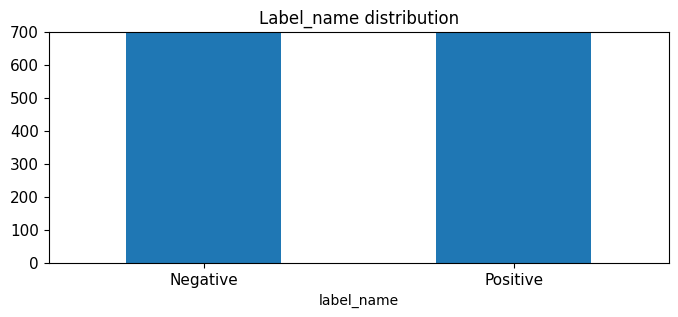

In [34]:
print(Books.label_name.value_counts())
# EX: Number of datas belonging to 'sci.med'
print('--' * 30)
print(Books.label_name.shape)

# plot barchart for Books
Books.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Label_name distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

503
label_name
Positive    503
Negative    497
Name: count, dtype: int64


"\nBy using the function 'max()', we can easily obtain the maximum length from 'X_sample.label_name.value_counts()'.\nThis way, we don't need to print the entire 'X_sample.label_name.value_counts()' and manually search for the maximum value.\n"

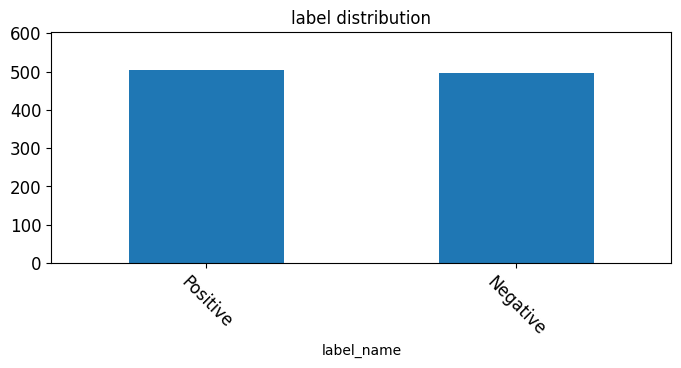

In [35]:
# random sample, random state
Books_sample = Books.sample(n=1000) #random state

# plot barchart for X_sample
print(max(Books_sample.label_name.value_counts()))
upper_bound = max(Books_sample.label_name.value_counts() + 100) # max_length + 100
print(Books_sample.label_name.value_counts())

Books_sample.label_name.value_counts().plot(kind = 'bar',
                                           title = 'label distribution',
                                           ylim = [0, upper_bound], 
                                           rot = -45, fontsize = 12, figsize = (8,3))

'''
By using the function 'max()', we can easily obtain the maximum length from 'X_sample.label_name.value_counts()'.
This way, we don't need to print the entire 'X_sample.label_name.value_counts()' and manually search for the maximum value.
'''

### ** >>> Exercise 8 ** 

0       Negative
1       Positive
2       Positive
3       Negative
4       Positive
          ...   
2995    Negative
2996    Negative
2997    Negative
2998    Negative
2999    Negative
Name: label_name, Length: 3000, dtype: object
------------------------------------------------------------------------------------------
label_name
Negative    1500
Positive    1500
Name: count, dtype: int64
------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
------------------------------------------------------------------------------------------


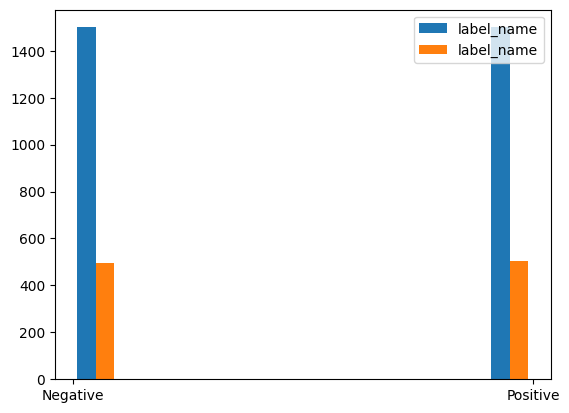

In [36]:
print(Books.label_name)
print('---' * 30)
print(Books.label_name.value_counts())
print('---' * 30)
print(type(Books.label_name.value_counts()))
print('---' * 30)

plt.hist([Books.label_name, Books_sample.label_name],
         label = ['label_name', 'label_name'])
plt.legend(loc='upper right')
plt.show()



### ** >>> Exercise 9 ** 

In [37]:
import nltk
import helpers.data_mining_helpers as dmh
# nltk.download('punkt')

In [38]:
# takes a like a minute or two to process
Books['unigrams'] = Books['text'].apply(lambda x: dmh.tokenize_text(x))

categories.append('unigrams')

# 把字、單字拆開，並新增一個calss
Books

,text,label,label_name,unigrams
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Positive,"[The, mic, is, great, .]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,Negative,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,Negative,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,Negative,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,Negative,"[The, whole, experience, was, underwhelming, ,..."


In [39]:
print(Books.text)
print('--' * 20)
print(type(Books.text))

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2995    I think food should have flavor and texture an...
2996                             Appetite instantly gone.
2997    Overall I was not impressed and would not go b...
2998    The whole experience was underwhelming, and I ...
2999    Then, as if I hadn't wasted enough of my life ...
Name: text, Length: 3000, dtype: object
----------------------------------------
<class 'pandas.core.series.Series'>


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# https://blog.csdn.net/weixin_38278334/article/details/82320307

count_vector = CountVectorizer()
Books_counts = count_vector.fit_transform(Books.text) # learn the vocabulary and return document-term matrix
print(Books_counts.shape)
print('--' * 30)
print(count_vector.get_feature_names_out())
print('--' * 30)
print(len(count_vector.get_feature_names_out()))
print('--' * 30)
print(Books_counts)

# There are 2748 documents and contain 5155 vocabularies.

(3000, 5155)
------------------------------------------------------------
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']
------------------------------------------------------------
5155
------------------------------------------------------------
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
  (1, 1993)	1
  (1, 713)	1
  (1, 1603)	1
  (1, 4861)	1
  (2, 1829)	1
  (2, 4531)	1
  (2, 2023)	1
  :	:
  (2999, 4545)	1
  (2999, 4609)	1
  (2999, 2432)	1
  (2999, 2314)	1
  (2999, 4531)	3
  (2999, 647)	1
  (2999, 2282)	1
  (2999, 4542)	1
  (2999, 3097)	1
  (2999, 4974)	1
  (2999, 2982)	1
  (2999, 4593)	1
  (2999, 297)	1
  (2999, 3166)	1
  (2999, 2630)	1
  (2999, 1540)	1
  (2999, 4548)	1
  (2999, 785)	1
  (2999, 4630)	1
  (2999, 588)	1
  (2999, 2068)	1
  (2999, 3857)	1
  (2999, 3437)	1
  (2999

In [41]:
print(Books_counts[0].shape)
print('--' * 30)
print(Books_counts[0])
# (0~2257, 0~35788)

# 以第0個為例子
# 第0個Document中(index)，'count_vector.vocabulary_'中index為'4161'的詞彙出現的次數(出現在第0個Document)
# len(X_counts) 最多會是 2748 * 5155 那麼多筆資料

(1, 5155)
------------------------------------------------------------
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [42]:
Books.text[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [43]:
analyze = count_vector.build_analyzer()
analyze(Books.text[0])

# Eliminate 'stop word', ex:I、you、he、she、the、and、...
# 刪除這種常出現但沒有提供太多實際意思的詞彙

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [44]:
print(Books.text[20])
analyze(Books.text[20])

I went on Motorola's website and followed all directions, but could not get it to pair again.


['went',
 'on',
 'motorola',
 'website',
 'and',
 'followed',
 'all',
 'directions',
 'but',
 'could',
 'not',
 'get',
 'it',
 'to',
 'pair',
 'again']

### ** >>> Exercise 10 ** 

In [45]:
# we convert from saprse array to SPARSE MATRIX

Books_counts[0:5, 0:100].toarray()

# The values of 'count_vect.vocabulary_' at indices 0 to 99 represent the frequencies of the corresponding words.
# The value at [0][0] represents the frequency of the word at index 0 in 'count_vect.vocabulary_' in the first document.

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [46]:
print(count_vector.get_feature_names_out()[45])

45


In [47]:
# we convert from saprse array to DENSE MATRIX

print(Books_counts[0:5, 0:100].toarray())

print('--' * 30)
print(count_vector.get_feature_names_out()[0:100])
print('--' * 30)

doc = 0
for raw in Books_counts[0:5, 0:100].toarray():
    index = 0
    for column in raw:
        if(column >= 1):
            print("第 {} 個Document(index = {})，\"count_vect.get_feature_names_out()\"中第 {} 個詞彙(index = {})，: {} ，期出現頻率為 {}".format(0 + doc + 1,
                                                                                                          0 + doc,                      
                                                                                                          index + 1,
                                                                                                          index, 
                                                                                                          count_vector.get_feature_names_out()[0 + index], 
                                                                                                          column))
        index += 1
    doc += 1

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

### ** >>> Exercise 11 ** 

In [48]:
# first twenty features only
plot_x = ["term_ {}".format(str(i)) for i in count_vector.get_feature_names_out()[0:20]]
print(plot_x)

['term_ 00', 'term_ 10', 'term_ 100', 'term_ 11', 'term_ 12', 'term_ 13', 'term_ 15', 'term_ 15g', 'term_ 15pm', 'term_ 17', 'term_ 18', 'term_ 18th', 'term_ 1928', 'term_ 1947', 'term_ 1948', 'term_ 1949', 'term_ 1971', 'term_ 1973', 'term_ 1979', 'term_ 1980']


In [49]:
print(Books.index)
print('--' * 30)
print(type(Books.index))
print('--' * 30)
print(list(Books.index))
print('--' * 30)
print(type(list(Books.index)))

RangeIndex(start=0, stop=3000, step=1)
------------------------------------------------------------
<class 'pandas.core.indexes.range.RangeIndex'>
------------------------------------------------------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [50]:
# obtain document index
plot_y = ["doc_ "+ str(i) for i in list(Books.index)[1000:1020]]
print(plot_y)

['doc_ 1000', 'doc_ 1001', 'doc_ 1002', 'doc_ 1003', 'doc_ 1004', 'doc_ 1005', 'doc_ 1006', 'doc_ 1007', 'doc_ 1008', 'doc_ 1009', 'doc_ 1010', 'doc_ 1011', 'doc_ 1012', 'doc_ 1013', 'doc_ 1014', 'doc_ 1015', 'doc_ 1016', 'doc_ 1017', 'doc_ 1018', 'doc_ 1019']


In [51]:
plot_z = Books_counts[0:20, 1000:1020].toarray() # X_counts[how many documents, how many terms]
print(plot_z)
print(plot_z.shape)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
(20, 20)


,term_ 00,term_ 10,term_ 100,term_ 11,term_ 12,term_ 13,term_ 15,term_ 15g,term_ 15pm,term_ 17,term_ 18,term_ 18th,term_ 1928,term_ 1947,term_ 1948,term_ 1949,term_ 1971,term_ 1973,term_ 1979,term_ 1980
doc_ 1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
doc_ 1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1003,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
doc_ 1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_ 1009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


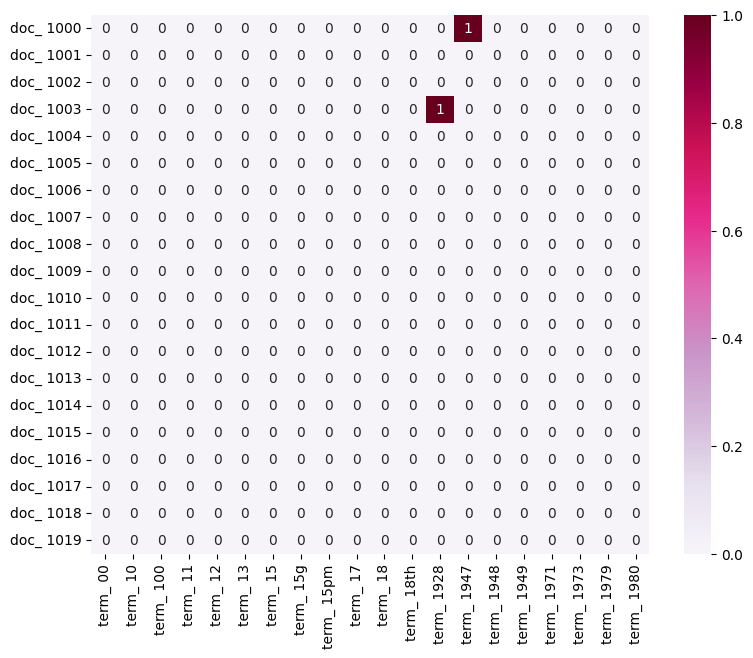

In [52]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7)) # The size of heat map.
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# cmap -> color of heat map.
# vmin、vmax -> the range of value in heat map.
# annot -> show the value in each small block.

(3000, 5155)


,rocketed,advise,gyros,nostalgia,beautifully,bigger,believed,many,ipod,15g,...,back,climbing,pushed,perfection,chefs,yelpers,cost,downside,v325i,sandwiches
1506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


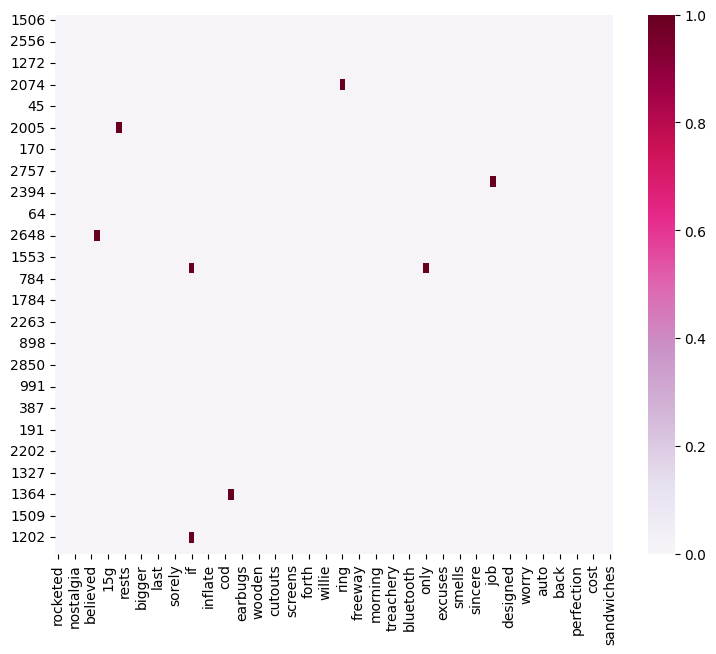

In [53]:
import numpy as np

print(Books_counts.shape)

sample_size_label = 100
sample_size_doc = 50

while(True):
    plot_x = np.random.choice(list(count_vector.get_feature_names_out()), sample_size_label)
    plot_y = np.random.choice(list(Books.index), sample_size_doc)
    plot_z = Books_counts[Books.index.isin(plot_y)][:, [count_vector.vocabulary_[term] for term in plot_x]]

    if(plot_z.shape[0] == plot_y.shape[0]):
        break

max_num = (np.max(plot_z))

df_todraw = pd.DataFrame(plot_z.toarray(), columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7)) # The size of heat map.
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = max_num)

# cmap -> color of heat map.
# vmin、vmax -> the range of value in heat map.
# annot -> show the value in each small block.

### ** >>> Exercise 12 ** 

In [54]:
from sklearn.decomposition import PCA

In [55]:
print(Books_counts.shape)
print("--" * 30)
Books_reduced = PCA(n_components = 2).fit_transform(Books_counts.toarray())
print(Books_reduced.shape)
print("--" * 30)
print(Books_reduced)
print("--" * 30)

# n_components -> Reducing the dimensionality to you want.
# .fit_transform -> Apply the PCA method.
# X_counts.toarray() -> sparse array to dense array(matrix).

(3000, 5155)
------------------------------------------------------------
(3000, 2)
------------------------------------------------------------
[[ 0.5311763   0.29542815]
 [-0.89432431 -0.35842818]
 [ 0.01667024 -0.66801936]
 ...
 [-0.49766653  0.41064087]
 [ 0.50420859  0.3655851 ]
 [ 2.33657525 -0.47388286]]
------------------------------------------------------------


In [56]:
Books

,text,label,label_name,unigrams
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Positive,"[The, mic, is, great, .]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,Negative,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,Negative,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,Negative,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,Negative,"[The, whole, experience, was, underwhelming, ,..."


In [57]:
Label_class = ["Positive", "Negative"]
Label_class

['Positive', 'Negative']

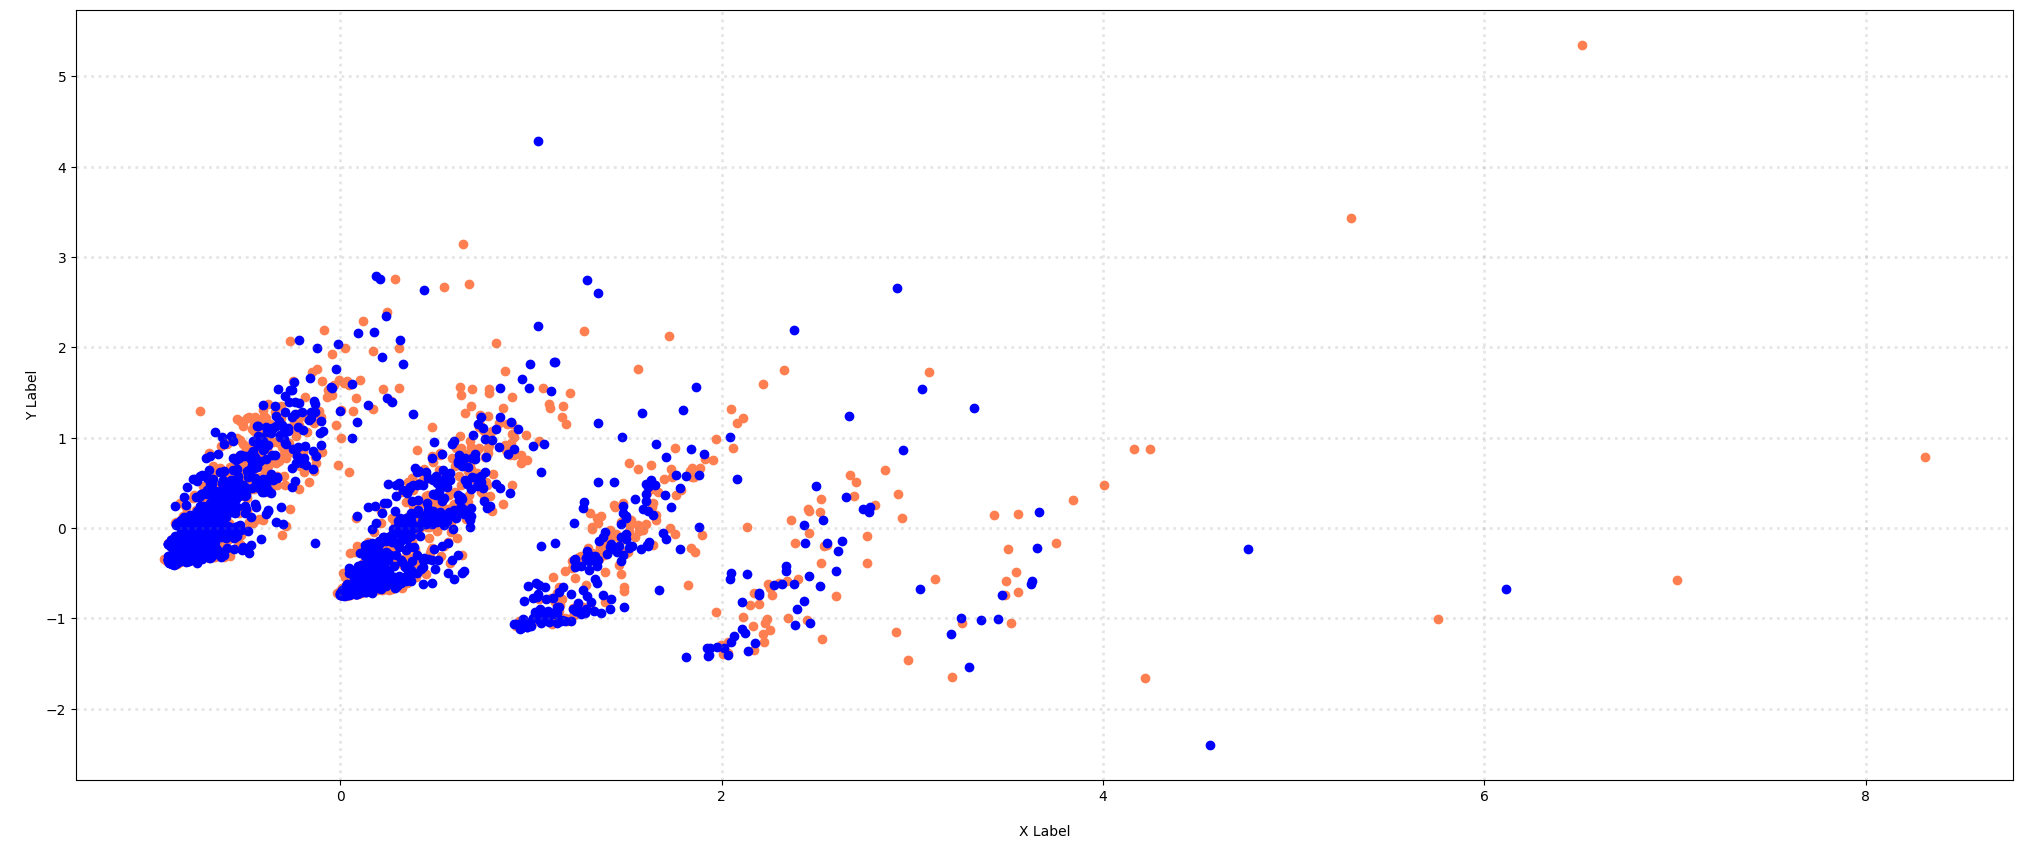

In [58]:
col = ['coral', 'blue']
# Using different color to represent different category.

# plot
# figsize -> (length, heigh)
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, lc in zip(col, Label_class):
    xs = Books_reduced[Books['label_name'] == lc].T[0]
    ys = Books_reduced[Books['label_name'] == lc].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

# c -> 點的顏色，c代表不同類別的每個點顏色皆不同
# marker -> 點的形狀

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

# color -> 網格顏色
# linestyle -> 格子樣式，':'表虛線
# alpha -> 網格透明度
# grid -> 將資料繪製於網格上

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(3000, 3)


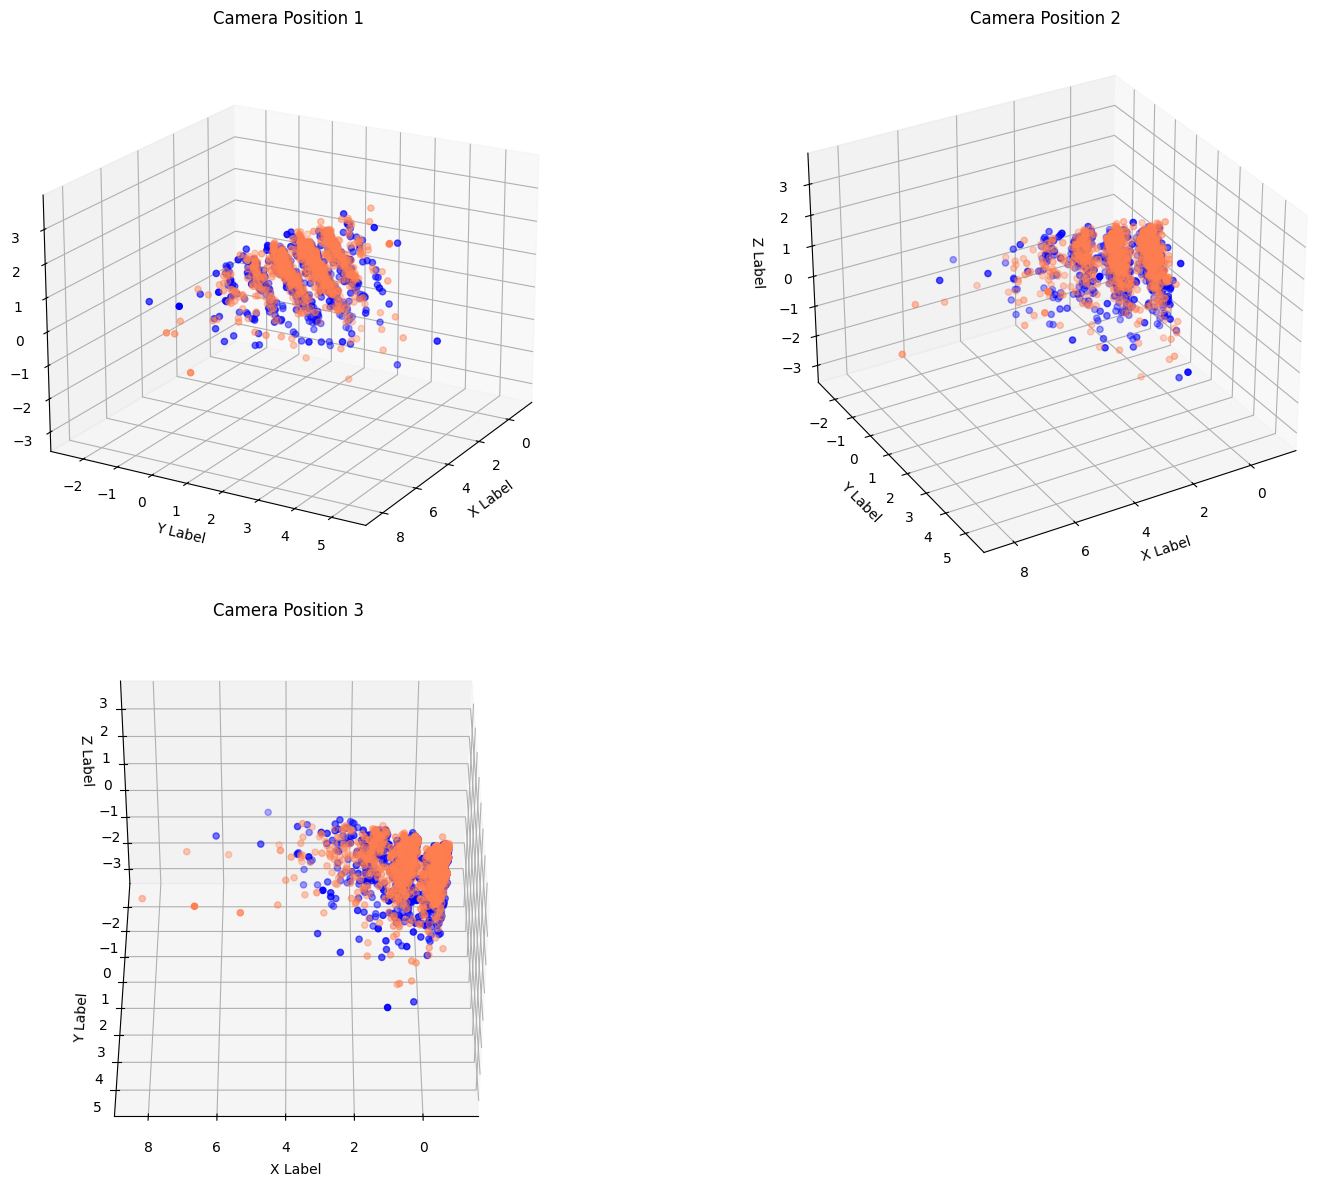

In [59]:
col = ['coral', 'blue']
Books_3d = PCA(n_components = 3).fit_transform(Books_counts.toarray())
print(Books_3d.shape)

fig = plt.figure(figsize=(16, 12))

#  Define the angles (elev, azim) for different camera positions
angles = [(20, 30), (30, 60), (40, 90)]

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')  # Create a subplot

    for c, lc in zip(col, Label_class):
        xs = Books_3d[Books['label_name'] == lc].T[0]
        ys = Books_3d[Books['label_name'] == lc].T[1]
        zs = Books_3d[Books['label_name'] == lc].T[2]

        ax.scatter(xs, ys, zs, c=c, marker='o')

    ax.set_title(f'Camera Position {i}')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

### ** >>> Exercise 13 ** 

In [60]:
term_frequencies = np.asarray(Books_counts.sum(axis = 0))[0]
np.asarray(Books_counts.sum(axis = 0))

array([[ 1, 38,  3, ...,  1,  2,  1]], dtype=int64)

In [61]:
np.asarray(Books_counts.sum(axis = 1))

array([[19],
       [ 4],
       [ 4],
       ...,
       [ 9],
       [16],
       [27]], dtype=int64)

C:\Users\Martin\AppData\Local\Temp\ipykernel_11688\573683187.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


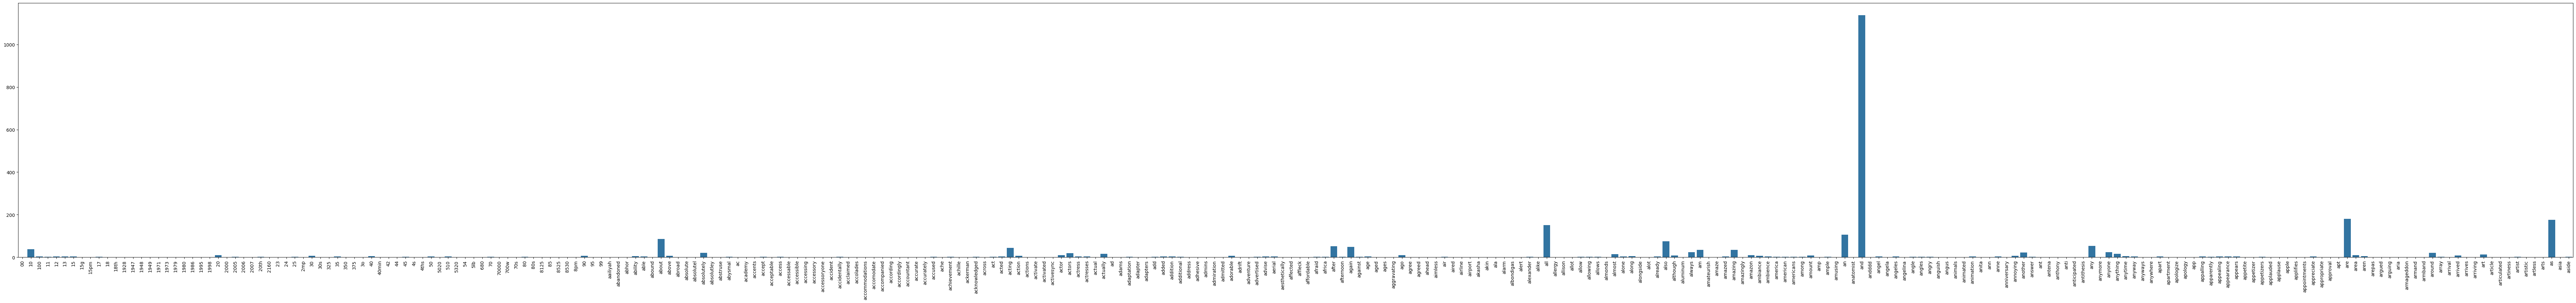

In [62]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x = count_vector.get_feature_names_out()[:300], 
            y = term_frequencies[:300])
g.set_xticklabels(count_vector.get_feature_names_out()[:300], rotation = 90)

In [63]:
# Answer here

import plotly.express as px

term_frequencies = np.asarray(Books_counts.sum(axis=0))[0]

data = pd.DataFrame({
    'Vocabulary': count_vector.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

fig = px.bar(data, x = 'Vocabulary', y = 'Frequency', text = 'Frequency', title = 'The first 300 Vocabulary Frequencies')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=45)
fig.show()

# x -> the value in x-axis is data['Vocabulary'].
# y -> the value in y-axis is data['Frequency'].
# text -> the text on the each bat is data['Frequency'].
# You can use the button on the up-right to zoom in or zoom out, or select the region which you interesting and it will be zoom in.

### ** >>> Exercise 14 ** 

In [64]:
import random

# Using this method will be faster because the time complexity of the original method may be O(n^2).
term_frequencies = np.asarray(Books_counts.sum(axis=0))[0]

# Random sample
sample_size = 50
random_index = random.sample(range(Books_counts.shape[1]), sample_size)

data = pd.DataFrame({
    'Vocabulary': [count_vector.get_feature_names_out()[i] for i in random_index],
    'Frequency': [term_frequencies[i] for i in random_index]
})

fig = px.bar(data, x = 'Vocabulary', y = 'Frequency', text = 'Frequency', title = 'Random sample {} Vocabulary Frequencies'.format(sample_size))
fig.update_traces(texttemplate = '%{text}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

### ** >>> Exercise 15 ** 

In [65]:
# Using this method will be faster because the time complexity of the original method may be O(n^2).
term_frequencies = np.asarray(Books_counts.sum(axis=0))[0]

# Random sample
sample_size = 200
random_index = random.sample(range(Books_counts.shape[1]), sample_size)

data = pd.DataFrame({
    'Vocabulary': [count_vector.get_feature_names_out()[i] for i in random_index],
    'Frequency': [term_frequencies[i] for i in random_index]
})

data = data.sort_values(by='Frequency', ascending=False)
fig = px.bar(data, x='Vocabulary', y='Frequency', title='Random {} Vocabulary Frequencies with Long Tail'.format(sample_size))
fig.update_traces(texttemplate = '%{text}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

# by -> According to this to sort.
# ascendinf -> False:From big to little.

C:\Users\Martin\AppData\Local\Temp\ipykernel_11688\1179449015.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


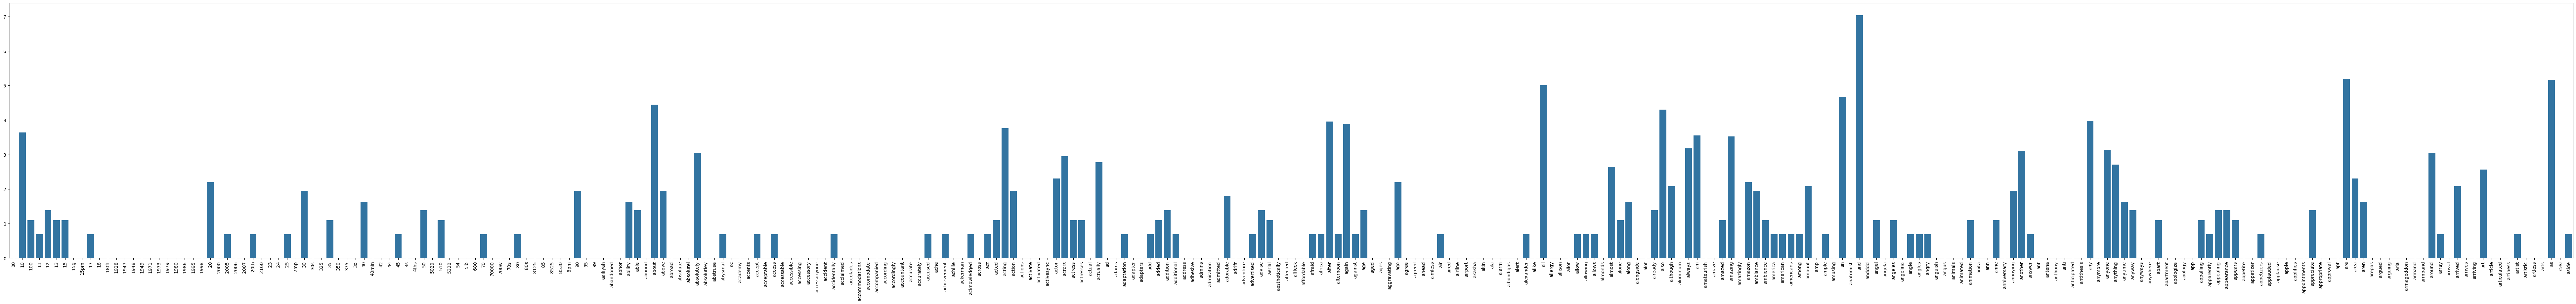

In [66]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vector.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vector.get_feature_names_out()[:300], rotation = 90)

### ** >>> Exercise 16 ** 

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(Books.label)

LabelBinarizer()

In [68]:
Books['bin_category'] = mlb.transform(Books['label']).tolist()

In [69]:
Books[0:9]

,text,label,label_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [70]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(Books.label_name)

# print(mlb.transform(X['category_name']))
Books['bin_label_name'] = mlb.transform(Books['label_name']).tolist()
Books[0:9]

# Yes, it work.
# fit -> Query all label(vucabulary) and distinguish them. I think 'fit' means to fit(擬合) something.
# transform -> To change something to another form.

,text,label,label_name,unigrams,bin_category,bin_label_name
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1],[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]


In [71]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Books.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Books.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Books.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [72]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [73]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vector.transform(document_to_transform_1)
document_vector_count_2 = count_vector.transform(document_to_transform_2)
document_vector_count_3 = count_vector.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Martin\AppData\Local\Temp\ipykernel_11688\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Martin\AppData\Local\Temp\ipykernel_11688\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Martin\AppData\Local\Temp\ipykernel_11688\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Martin\AppData\Local\Temp\ipykernel_11688\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 t

## Part 3. Attemp three test

### Another data visualizations ###

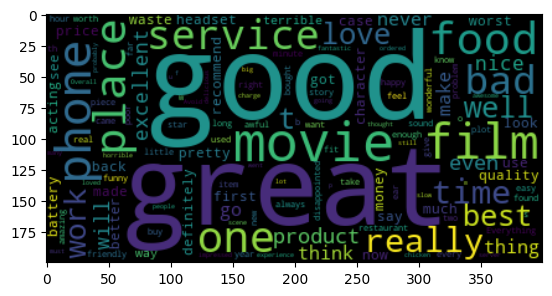

<class 'pandas.core.series.Series'>


'\nWord clouds are generated based on the frequency of words in the text.\n'

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(Books.text.to_string())

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

print(type(Books.text))

'''
Word clouds are generated based on the frequency of words in the text.
'''

Top 10 frequency [1953 1138  789  754  670  643  624  571  400  336]


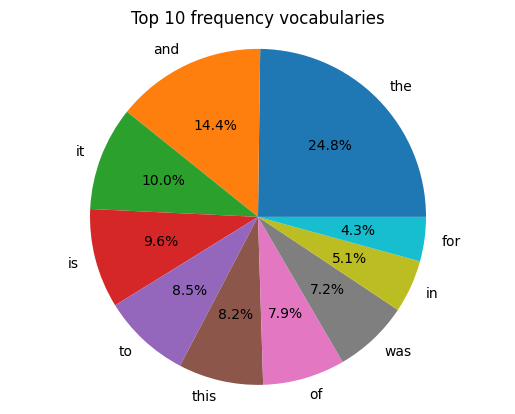

In [76]:
term_frequencies = np.asarray(Books_counts.sum(axis=0))[0]

most_frequent_index = sorted(range(len(term_frequencies)), key = lambda i: term_frequencies[i], reverse=True)[:10]

word = count_vector.get_feature_names_out()[most_frequent_index]

print("Top 10 frequency", term_frequencies[most_frequent_index])

plt.figure()
plt.pie(term_frequencies[most_frequent_index], labels = word, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Top 10 frequency vocabularies")
plt.show()

### TF-IDF features ###

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer


text_data = Books['text']

# Create TfidfVectorizer.
TFIDF_vectorizer = TfidfVectorizer()

# By fit_transform method to compute TF-IDF features.
TFIDF_features = TFIDF_vectorizer.fit_transform(text_data)

print(TFIDF_features.toarray())

TFIDF = pd.DataFrame(TFIDF_features.toarray(), columns = count_vector.get_feature_names_out())
TFIDF


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# Using this method will be faster because the time complexity of the original method may be O(n^2).
term_frequencies = np.asarray(TFIDF.sum(axis=0))

# Random sample
sample_size = 200
random_index = random.sample(range(TFIDF.shape[1]), sample_size)

data = pd.DataFrame({
    'Vocabulary': [count_vector.get_feature_names_out()[i] for i in random_index],
    'Frequency': [term_frequencies[i] for i in random_index]
})

data = data.sort_values(by='Frequency', ascending=False)
fig = px.bar(data, x='Vocabulary', y='Frequency', title='Random {} TF-IDF Frequencies with Long Tail'.format(sample_size))
fig.update_traces(texttemplate = '%{text}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

# by -> According to this to sort.
# ascendinf -> False:From big to little.

### Naive Bayes classifier ###

In [79]:
# Books_counts

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(Books_counts, label_nameList, test_size=0.2, random_state=42)

# Create Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Books_counts -> Accuracy: {accuracy}")


Books_counts -> Accuracy: 0.8333333333333334


In [80]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[256  43]
 [ 57 244]]


In [81]:
# TFIDF

X_train, X_test, y_train, y_test = train_test_split(TFIDF, label_nameList, test_size=0.2)

# Create Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"TFIDF -> Accuracy: {accuracy}")


TFIDF -> Accuracy: 0.81


In [82]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[246  56]
 [ 58 240]]


In [83]:
'''
Before explaining the differences between counts and TF-IDF methods, let's first clarify the principle of TF-IDF.
The TF (Term Frequency) formula calculates the probability of a term appearing in a document,
while IDF (Inverse Document Frequency) computes the total number of documents divided by the number of documents in which a term appears.
Therefore, IDF focuses on the frequency of a term appearing in all documents.
If a term appears more frequently in all documents, it is considered less important.
Hence, a higher IDF indicates greater importance for a term. Finally, the TF-IDF algorithm multiplies TF by IDF,
which not only represents the term's frequency but also takes its importance into account.

Based on the above summary, the most significant difference between the two methods lies in whether they consider the importance of a term.
'''

"\nBefore explaining the differences between counts and TF-IDF methods, let's first clarify the principle of TF-IDF.\nThe TF (Term Frequency) formula calculates the probability of a term appearing in a document,\nwhile IDF (Inverse Document Frequency) computes the total number of documents divided by the number of documents in which a term appears.\nTherefore, IDF focuses on the frequency of a term appearing in all documents.\nIf a term appears more frequently in all documents, it is considered less important.\nHence, a higher IDF indicates greater importance for a term. Finally, the TF-IDF algorithm multiplies TF by IDF,\nwhich not only represents the term's frequency but also takes its importance into account.\n\nBased on the above summary, the most significant difference between the two methods lies in whether they consider the importance of a term.\n"

## Part 4. Some inefficent parts ##

1. Too many meaningless words

Top 10 frequency [1953 1138  789  754  670  643  624  571  400  336]


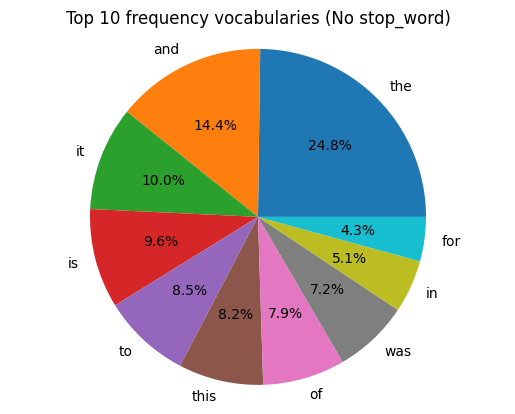

'\nFrom this pie chart, we can observe that the top 10 frequency vocabularies contain too many meaningless vocabularies.\n'

In [84]:
term_frequencies = np.asarray(Books_counts.sum(axis=0))[0]
most_frequent_index = sorted(range(len(term_frequencies)), key = lambda i: term_frequencies[i], reverse=True)[:10]

word = count_vector.get_feature_names_out()[most_frequent_index]

print("Top 10 frequency", term_frequencies[most_frequent_index])

plt.figure()
plt.pie(term_frequencies[most_frequent_index], labels = word, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Top 10 frequency vocabularies (No stop_word)")
plt.show()

'''
From this pie chart, we can observe that the top 10 frequency vocabularies contain too many meaningless vocabularies.
'''

Top 10 frequency [230 210 182 168 163 146 126 125 114 112]


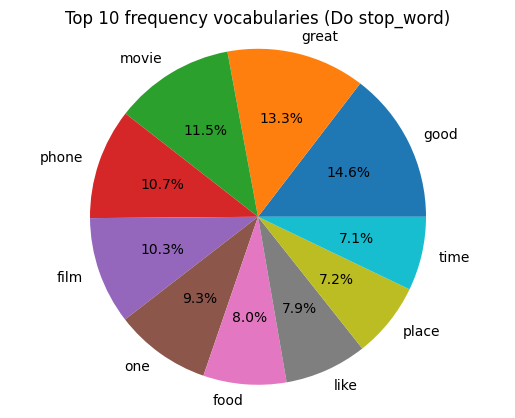

'\nAfter adopting stop_word, you can see the pie chart. The pie chart is more similar with wordcloud.\nSo, we also obtain that the wordcloud function or module would adopt stop_word method.\n'

In [85]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
    'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn',
    'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
]

count_vector = CountVectorizer(stop_words = stop_words)
Books_counts = count_vector.fit_transform(Books.text) # learn the vocabulary and return document-term matrix

term_frequencies = np.asarray(Books_counts.sum(axis=0))[0]
most_frequent_index = sorted(range(len(term_frequencies)), key = lambda i: term_frequencies[i], reverse=True)[:10]

word = count_vector.get_feature_names_out()[most_frequent_index]

print("Top 10 frequency", term_frequencies[most_frequent_index])

plt.figure()
plt.pie(term_frequencies[most_frequent_index], labels = word, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Top 10 frequency vocabularies (Do stop_word)")
plt.show()

'''
After adopting stop_word, you can see the pie chart. The pie chart is more similar with wordcloud.
So, we also obtain that the wordcloud function or module would adopt stop_word method.
'''